In [72]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
import seaborn as sns

In [73]:
##### 01 #####

df = pd.read_csv('C:/Users/dsadm/Desktop/somativaIABDjessy/SomativaIABDjessy/dadosacoes.csv', sep = ',')

In [74]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


Text(0.5, 1.0, 'Box plot Nome Ação x Valor de mercado R$ -(Bilhões)')

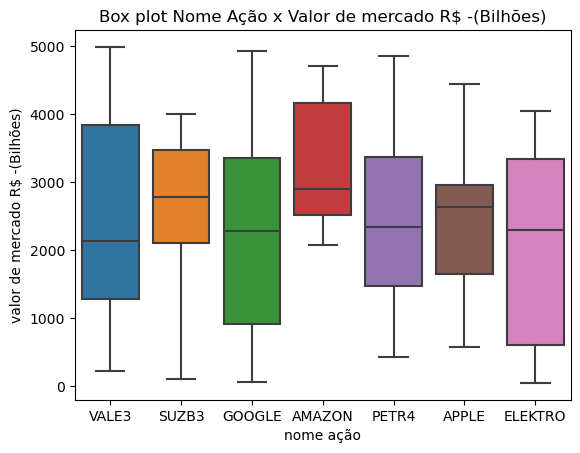

In [75]:
##### 02 #####

sns.boxplot(x=df['nome ação'],y=df['valor de mercado R$ -(Bilhões)']) 
plt.title("Box plot Nome Ação x Valor de mercado R$ -(Bilhões)")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [77]:
df.describe

<bound method NDFrame.describe of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

In [90]:
##### 03 ######

dados_ativos = pd.get_dummies(df,columns=['nome ação'], drop_first=True)

In [91]:
dados_ativos.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,0,0,0,0,0,1
1,91,71,3069,0,0,0,0,1,0
2,165,41,2815,0,0,0,0,1,0
3,56,34,3613,0,0,0,0,1,0
4,212,9,2975,0,0,1,0,0,0


In [92]:
dic = {1:'True',0:'False'}
dados_ativos.rename(columns=dic,inplace=True)

In [93]:
dados_ativos.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,0,0,0,0,0,1
1,91,71,3069,0,0,0,0,1,0
2,165,41,2815,0,0,0,0,1,0
3,56,34,3613,0,0,0,0,1,0
4,212,9,2975,0,0,1,0,0,0


In [94]:
##### 04.A #####

kmeans = KMeans(n_clusters=5) 
kmeans.fit(dados_ativos)

KMeans(n_clusters=5)

In [95]:
sse = kmeans.inertia_
print(sse)

8688440.119978353


In [96]:
##### 04.B #####

kmeans = KMeans(n_clusters=6) 
kmeans.fit(dados_ativos)

KMeans(n_clusters=6)

In [97]:
sse = kmeans.inertia_
print(sse)

5428800.239280457


In [98]:
##### 05 #####

labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_ 

Text(0, 0.5, 'Valor de mercado R$ -(Bilhões)')

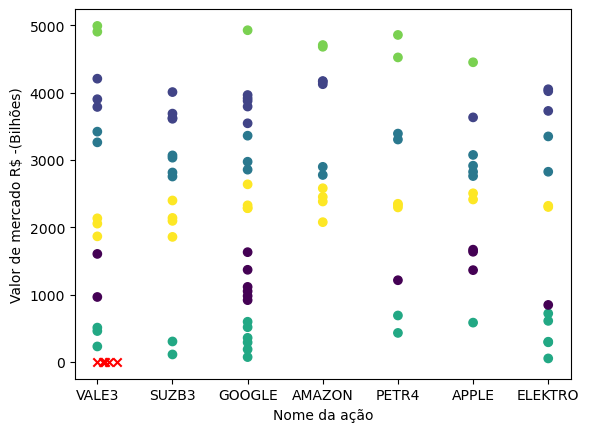

In [103]:
##### GRÁFICO 2D #####

plt.scatter(df['nome ação'],df['valor de mercado R$ -(Bilhões)'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Nome da ação")
plt.ylabel("Valor de mercado R$ -(Bilhões)")

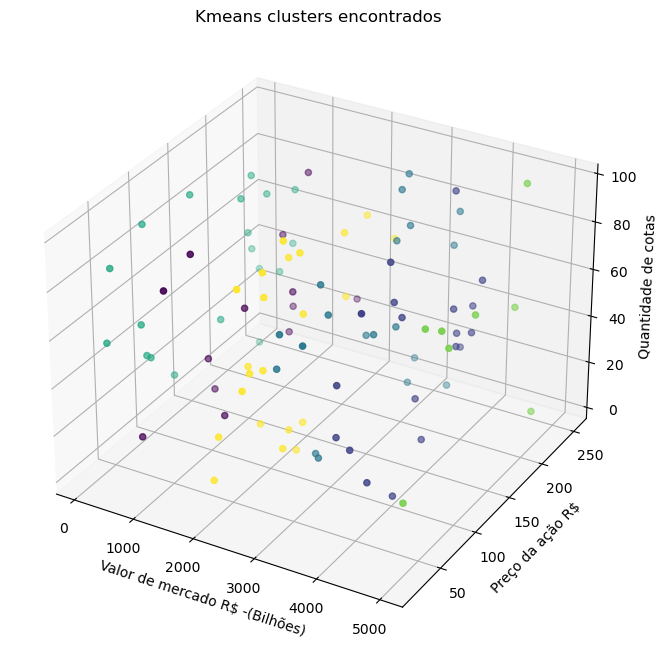

In [105]:
##### GRÁFICO 3D #####

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(df['valor de mercado R$ -(Bilhões)'], df['preço ação R$'], df['qtde cotas'], c=labels)


ax.set_title('Kmeans clusters encontrados' )
ax.set_xlabel('Valor de mercado R$ -(Bilhões)')
ax.set_ylabel('Preço da ação R$')
ax.set_zlabel('Quantidade de cotas')

plt.show()

A vantagem está na capacidade de explorar dados não rotulados, possibilitando a descoberta de informações e padrões sem a necessidade de conhecimento prévio ou anotações, o que pode ser crucial em conjuntos de dados extremamente grandes e complexos.